In [2]:
%matplotlib inline
import numpy as np
import mne
import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.use("Qt5Agg") # for interactive plots

In [3]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_raw_file = sample_data_folder / "MEG" / "sample" / "sample_audvis_raw.fif"
raw = mne.io.read_raw_fif(sample_data_raw_file, verbose=False).crop(tmax=60)

In [4]:
eeg = raw.copy().pick(picks=["eeg"])

Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


In [5]:
events = mne.find_events(raw, stim_channel="STI 014")
epochs = mne.Epochs(eeg, events, tmin=-0.3, tmax=0.7)

86 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
86 matching events found
Setting baseline interval to [-0.2996928197375818, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated


In [21]:
len(epochs.events)

86

In [6]:
epochs.average() # need epoched data



<Evoked | '0.23 × 1 + 0.23 × 2 + 0.23 × 3 + 0.21 × 4 + 0.05 × 5 + 0.05 × 32' (average, N=85), -0.29969 – 0.69928 sec, baseline -0.299693 – 0 sec, 60 ch, ~3.2 MB>

In [23]:
print(len(epochs.get_channel_types()))
epochs.get_channel_types()

60


['eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg',
 'eeg']

In [24]:
epochs.average()

<Evoked | '0.23 × 1 + 0.23 × 2 + 0.23 × 3 + 0.21 × 4 + 0.05 × 5 + 0.05 × 32' (average, N=85), -0.29969 – 0.69928 sec, baseline -0.299693 – 0 sec, 60 ch, ~3.2 MB>

In [7]:
print(epochs.get_data().shape)
epochs.get_data()

Loading data for 86 events and 601 original time points ...
1 bad epochs dropped
(85, 60, 601)
Loading data for 85 events and 601 original time points ...


array([[[-8.31165980e-06, -9.36482144e-06, -7.56825159e-06, ...,
          8.04332093e-06,  1.41764387e-05,  1.32471784e-05],
        [-6.84768073e-06, -9.78499756e-06, -1.25460754e-05, ...,
          1.13049373e-05,  1.46534785e-05,  1.23623714e-05],
        [-9.46832088e-06, -1.04336529e-05, -1.12783185e-05, ...,
          1.28549831e-05,  1.48459805e-05,  1.26136501e-05],
        ...,
        [ 7.53232831e-07, -1.87188921e-06, -5.12475782e-06, ...,
         -1.64361773e-06,  2.39621997e-07, -4.43994338e-06],
        [-3.57322901e-07, -3.41671009e-06, -7.39391343e-06, ...,
          7.44056486e-07,  2.51850106e-06, -2.56008168e-06],
        [-6.35758386e-07, -3.44239907e-06, -7.65236009e-06, ...,
         -1.09513259e-07,  2.34629734e-06, -2.44838049e-06]],

       [[-5.64606902e-06, -4.65485807e-06, -7.51964939e-07, ...,
         -2.15673950e-05, -2.02664306e-05, -2.06381347e-05],
        [-4.42609831e-06, -1.37128880e-06, -7.25079095e-07, ...,
         -7.30466880e-06, -4.95481534e

In [26]:
# Iterate
for i in range(len(epochs)):
    print(f"Epoch {i}:")
    print(f"  Data shape: {epochs[i].get_data().shape}")
    print(f"  Channel types: {epochs[i].get_channel_types()}")
    print(f"  Montage: {epochs[i].get_montage()}")
    print()

Epoch 0:
Loading data for 1 events and 601 original time points ...
  Data shape: (1, 60, 601)
  Channel types: ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']
  Montage: <DigMontage | 78 extras (headshape), 4 HPIs, 3 fiducials, 60 channels>

Epoch 1:
Loading data for 1 events and 601 original time points ...
  Data shape: (1, 60, 601)
  Channel types: ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg'

In [27]:
epochs.plot()  # Default is to show only the first 20 epochs and 20 channels
plt.show()

Using qt as 2D backend.
Loading data for 20 events and 601 original time points ...
Loading data for 8 events and 601 original time points ...


2025-05-12 18:20:25.435 python[15988:283541] +[IMKClient subclass]: chose IMKClient_Modern
2025-05-12 18:20:25.435 python[15988:283541] +[IMKInputSession subclass]: chose IMKInputSession_Modern


In [28]:
# Print the annotations
print(epochs.annotations)

# Print the first 10 samples of the data
print(epochs)

<Annotations | 0 segments>
<Epochs |  85 events (all good), -0.299693 - 0.699283 sec, baseline -0.299693 – 0 sec, ~2.9 MB, data not loaded,
 '1': 20
 '2': 20
 '3': 19
 '4': 18
 '5': 4
 '32': 4>


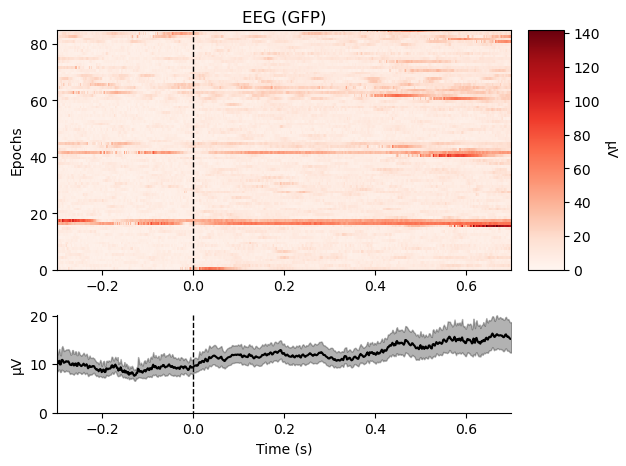

[<Figure size 640x480 with 3 Axes>]

In [29]:
epochs.plot_image()

In [8]:
epochs.ch_names

['EEG 001',
 'EEG 002',
 'EEG 003',
 'EEG 004',
 'EEG 005',
 'EEG 006',
 'EEG 007',
 'EEG 008',
 'EEG 009',
 'EEG 010',
 'EEG 011',
 'EEG 012',
 'EEG 013',
 'EEG 014',
 'EEG 015',
 'EEG 016',
 'EEG 017',
 'EEG 018',
 'EEG 019',
 'EEG 020',
 'EEG 021',
 'EEG 022',
 'EEG 023',
 'EEG 024',
 'EEG 025',
 'EEG 026',
 'EEG 027',
 'EEG 028',
 'EEG 029',
 'EEG 030',
 'EEG 031',
 'EEG 032',
 'EEG 033',
 'EEG 034',
 'EEG 035',
 'EEG 036',
 'EEG 037',
 'EEG 038',
 'EEG 039',
 'EEG 040',
 'EEG 041',
 'EEG 042',
 'EEG 043',
 'EEG 044',
 'EEG 045',
 'EEG 046',
 'EEG 047',
 'EEG 048',
 'EEG 049',
 'EEG 050',
 'EEG 051',
 'EEG 052',
 'EEG 053',
 'EEG 054',
 'EEG 055',
 'EEG 056',
 'EEG 057',
 'EEG 058',
 'EEG 059',
 'EEG 060']

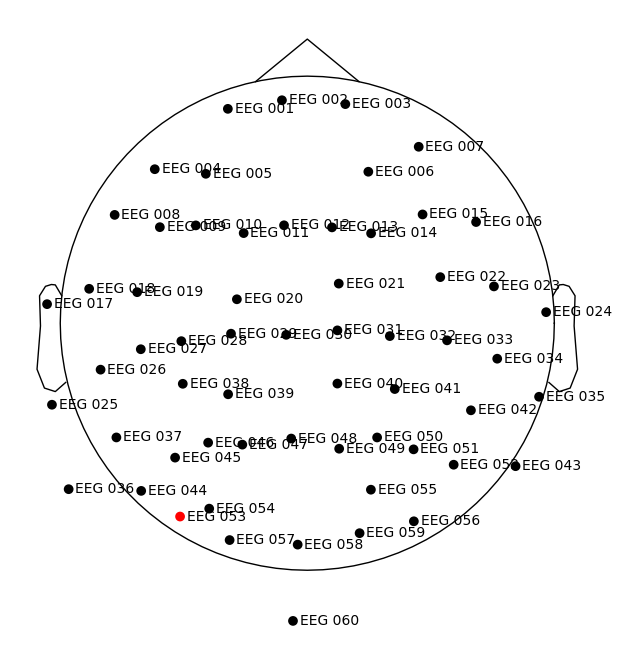

In [30]:
epochs.plot_sensors(kind='topomap', ch_type='eeg', show_names=True)
plt.show()

/opt/anaconda3/envs/deepEEG/lib/python3.12/site-packages/mne/viz/utils.py:137: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


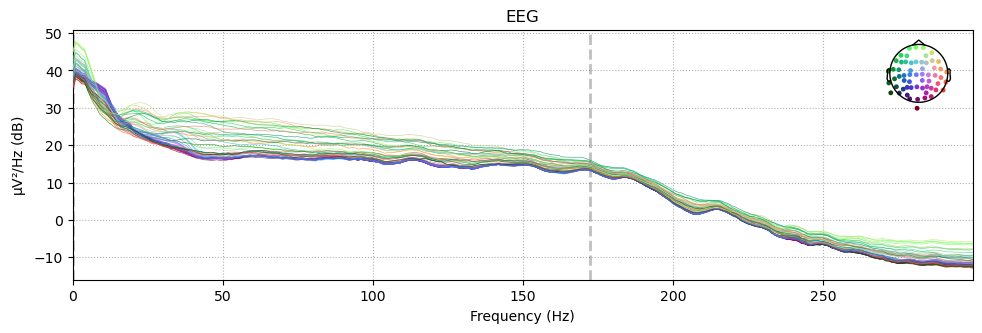

In [31]:
epochs.plot_psd()
plt.show()

In [32]:
df = epochs.to_data_frame()
df

,time,condition,epoch,EEG 001,EEG 002,EEG 003,EEG 004,EEG 005,EEG 006,EEG 007,...,EEG 051,EEG 052,EEG 053,EEG 054,EEG 055,EEG 056,EEG 057,EEG 058,EEG 059,EEG 060
0,-0.299693,2,0,-8.311660,-6.847681,-9.468321,1.838086,-2.535419,-8.797985,-6.942615,...,0.593644,0.106806,1.873406,0.993330,1.328203,1.081930,0.442982,0.753233,-0.357323,-0.635758
1,-0.298028,2,0,-9.364821,-9.784998,-10.433653,-2.723315,-6.357684,-12.846447,-10.319263,...,-1.950911,-2.409399,0.875359,-1.856829,-0.975996,-1.482218,-2.347362,-1.871889,-3.416710,-3.442399
2,-0.296363,2,0,-7.568252,-12.546075,-11.278318,-4.975146,-10.478565,-15.203014,-17.197620,...,-5.189437,-5.355200,0.625847,-5.114153,-3.989180,-5.238993,-5.422436,-5.124758,-7.393913,-7.652360
3,-0.294698,2,0,-6.638991,-14.073480,-12.846983,-4.917407,-10.478565,-14.417492,-24.326099,...,-5.999068,-5.907538,2.621941,-5.753985,-4.698164,-6.193094,-5.991894,-5.752504,-7.822228,-8.061662
4,-0.293033,2,0,-3.913161,-10.959924,-10.071653,-0.471484,-5.760455,-9.462658,-23.075489,...,-2.066573,-1.918432,1.811028,-1.856829,-1.212324,-1.720743,-2.233471,-1.472414,-3.049584,-3.091569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51080,0.692623,2,84,-1.068906,2.067482,-1.273665,-2.249279,0.347119,-10.731912,3.262642,...,-16.442482,-11.317327,-6.263296,10.301898,-12.475449,-13.218392,8.769024,2.679352,-1.643618,6.609561
51081,0.694288,2,84,-5.653257,0.892555,-4.893660,-2.480236,1.481854,-12.846780,8.577736,...,-17.309944,-11.378698,-4.329580,10.301898,-13.243515,-13.397286,8.484295,2.222809,-2.439058,6.843448
51082,0.695953,2,84,-2.555722,1.891243,-3.747328,3.409168,1.661023,-9.946390,11.078957,...,-15.632850,-9.660314,-4.329580,12.221393,-11.648300,-10.952401,10.591289,4.106049,-0.481051,9.357730
51083,0.697618,2,84,6.612979,1.303779,-0.127333,8.836658,1.004071,-10.550638,7.077004,...,-14.881050,-9.046606,-5.202871,12.395892,-11.057480,-9.342354,10.420452,4.277253,-0.052736,9.533145


In [33]:
# Print dataframe sizes and statistics
print("DataFrame shape:", df.shape)
print("DataFrame columns:", df.columns)
print("DataFrame info:")
print(df.info())
print("DataFrame description:")
print(df.describe())
# Print the first 5 rows of the DataFrame
print("First 5 rows of DataFrame:")
print(df.head())

DataFrame shape: (51085, 63)
DataFrame columns: Index(['time', 'condition', 'epoch', 'EEG 001', 'EEG 002', 'EEG 003',
       'EEG 004', 'EEG 005', 'EEG 006', 'EEG 007', 'EEG 008', 'EEG 009',
       'EEG 010', 'EEG 011', 'EEG 012', 'EEG 013', 'EEG 014', 'EEG 015',
       'EEG 016', 'EEG 017', 'EEG 018', 'EEG 019', 'EEG 020', 'EEG 021',
       'EEG 022', 'EEG 023', 'EEG 024', 'EEG 025', 'EEG 026', 'EEG 027',
       'EEG 028', 'EEG 029', 'EEG 030', 'EEG 031', 'EEG 032', 'EEG 033',
       'EEG 034', 'EEG 035', 'EEG 036', 'EEG 037', 'EEG 038', 'EEG 039',
       'EEG 040', 'EEG 041', 'EEG 042', 'EEG 043', 'EEG 044', 'EEG 045',
       'EEG 046', 'EEG 047', 'EEG 048', 'EEG 049', 'EEG 050', 'EEG 051',
       'EEG 052', 'EEG 053', 'EEG 054', 'EEG 055', 'EEG 056', 'EEG 057',
       'EEG 058', 'EEG 059', 'EEG 060'],
      dtype='object')
DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51085 entries, 0 to 51084
Data columns (total 63 columns):
 #   Column     Non-Null Count  Dtype

In [34]:
# Print unique values of time, condition, and epoch columns
print("Unique values in 'time' column:", df['time'].unique())
print("Unique values in 'condition' column:", df['condition'].unique())
print("Unique values in 'epoch' column:", df['epoch'].unique())

Unique values in 'time' column: [-0.29969282 -0.29802786 -0.2963629  -0.29469794 -0.29303298 -0.29136802
 -0.28970306 -0.2880381  -0.28637314 -0.28470818 -0.28304322 -0.28137826
 -0.2797133  -0.27804834 -0.27638338 -0.27471842 -0.27305346 -0.2713885
 -0.26972354 -0.26805858 -0.26639362 -0.26472866 -0.2630637  -0.26139874
 -0.25973378 -0.25806882 -0.25640386 -0.2547389  -0.25307394 -0.25140898
 -0.24974402 -0.24807906 -0.2464141  -0.24474914 -0.24308418 -0.24141922
 -0.23975426 -0.2380893  -0.23642434 -0.23475938 -0.23309442 -0.23142946
 -0.2297645  -0.22809954 -0.22643457 -0.22476961 -0.22310465 -0.22143969
 -0.21977473 -0.21810977 -0.21644481 -0.21477985 -0.21311489 -0.21144993
 -0.20978497 -0.20812001 -0.20645505 -0.20479009 -0.20312513 -0.20146017
 -0.19979521 -0.19813025 -0.19646529 -0.19480033 -0.19313537 -0.19147041
 -0.18980545 -0.18814049 -0.18647553 -0.18481057 -0.18314561 -0.18148065
 -0.17981569 -0.17815073 -0.17648577 -0.17482081 -0.17315585 -0.17149089
 -0.16982593 -0.1681

In [9]:
import mne

# Load the EDF file
raw = mne.io.read_raw_edf('sub-NORB00001_ses-1_task-EEG_eeg.edf', preload=False)

# Print the channel names
print(raw.ch_names)

Extracting EDF parameters from /Users/cccohen/deepEEG/DataExploration/sub-NORB00001_ses-1_task-EEG_eeg.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'FZ', 'CZ', 'PZ', 'Pg1', 'Pg2']


In [10]:
import mne

# Load the EDF file
raw = mne.io.read_raw_fif('sub-NORB00004raw.fif', preload=False)

# Print the channel names
print(raw.ch_names)

Opening raw data file sub-NORB00004raw.fif...
Isotrak not found
    Range : 0 ... 148799 =      0.000 ...   743.995 secs
Ready.
['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'FZ', 'CZ', 'PZ']


In [5]:
raw.rename_channels({ch: f'EEG {ch.upper()}-REF' for ch in raw.ch_names})


<RawEDF | sub-NORB00001_ses-1_task-EEG_eeg.edf, 21 x 142800 (714.0 s), ~21 KiB, data not loaded>

In [6]:
print(raw.ch_names)

['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG PG1-REF', 'EEG PG2-REF']


In [ ]:
import mne

raw = mne.io.read_raw_e("sub-NORB00001_ses-1_task-EEG_eeg.edf", preload=True, verbose=False)
annotations = raw.annotations
print(annotations)

<Annotations | 0 segments>


In [3]:
import torch

# Load the checkpoint
ckpt_path = "/Users/cccohen/deepEEG/DataExploration/checkpoint-best.pth"
checkpoint = torch.load(ckpt_path, map_location='cpu', weights_only=False)
print(checkpoint.keys())


dict_keys(['model', 'optimizer', 'epoch', 'args', 'scaler'])


In [4]:
model_state_dict = checkpoint['model']
print(model_state_dict.keys())

odict_keys(['chan_conv.0.weight', 'chan_conv.0.bias', 'chan_conv.1.weight', 'chan_conv.1.bias', 'chan_conv.1.running_mean', 'chan_conv.1.running_var', 'chan_conv.1.num_batches_tracked', 'chan_conv.3.weight', 'chan_conv.3.bias', 'chan_conv.4.weight', 'chan_conv.4.bias', 'chan_conv.4.running_mean', 'chan_conv.4.running_var', 'chan_conv.4.num_batches_tracked', 'target_encoder.summary_token', 'target_encoder.patch_embed.proj.weight', 'target_encoder.patch_embed.proj.bias', 'target_encoder.chan_embed.weight', 'target_encoder.blocks.0.norm1.weight', 'target_encoder.blocks.0.norm1.bias', 'target_encoder.blocks.0.attn.qkv.weight', 'target_encoder.blocks.0.attn.qkv.bias', 'target_encoder.blocks.0.attn.proj.weight', 'target_encoder.blocks.0.attn.proj.bias', 'target_encoder.blocks.0.norm2.weight', 'target_encoder.blocks.0.norm2.bias', 'target_encoder.blocks.0.mlp.fc1.weight', 'target_encoder.blocks.0.mlp.fc1.bias', 'target_encoder.blocks.0.mlp.fc2.weight', 'target_encoder.blocks.0.mlp.fc2.bias', 

In [ ]:
print(model_state_dict['chan_conv.0.weight'].shape)
# output means: 20 output channels, 19 input channels, a 1×1 kernel (spatial dimensions)

torch.Size([20, 19, 1, 1])
